In [2]:
print("hakdog")

hakdog


In [3]:
#manual implementations of the linear regression


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [14]:
np.random.seed()
x = 2.5 * np.random.rand(100) + 1.5
y = 0.5 * np.random.rand(100)
df = pd.DataFrame({'x': x, 'y':y})


In [27]:
xmean = np.mean(x)
ymean = np.mean(y)

df['xycov'] = ((df['x'] -xmean) * (df['y']-ymean))
df['xvar'] = (df['x'] - xmean)**2

beta = df['xycov'].sum()/df['xvar'].sum()
alpha = ymean - (beta * xmean)

print(beta)
print(alpha)


-0.003775800394628441
0.2622570169436901


In [30]:
#y = bx +a
ypred = beta*x + alpha
ypred

array([0.2503878 , 0.2532077 , 0.25090943, 0.25410725, 0.25442248,
       0.25376651, 0.25635432, 0.25201936, 0.25580752, 0.24952552,
       0.25120244, 0.2493267 , 0.24787619, 0.25063364, 0.25273289,
       0.25602497, 0.25640338, 0.25157177, 0.25146329, 0.25440972,
       0.255931  , 0.25577543, 0.24826175, 0.25365446, 0.25177782,
       0.25369192, 0.25189756, 0.25198187, 0.24967191, 0.25609662,
       0.25068966, 0.25274239, 0.25628794, 0.25299935, 0.25174044,
       0.25177001, 0.24874713, 0.24724161, 0.25518279, 0.25369291,
       0.25237941, 0.25160871, 0.25655981, 0.25260122, 0.24787467,
       0.25131023, 0.24844287, 0.25537291, 0.25425079, 0.25544037,
       0.24744718, 0.24723591, 0.25422791, 0.25154274, 0.2533403 ,
       0.248599  , 0.25062748, 0.24800944, 0.25420437, 0.25433371,
       0.25344783, 0.25180829, 0.25229274, 0.25225712, 0.25053842,
       0.25266189, 0.24881955, 0.25644887, 0.25335048, 0.2510822 ,
       0.24866386, 0.25266419, 0.25446794, 0.24876201, 0.25240

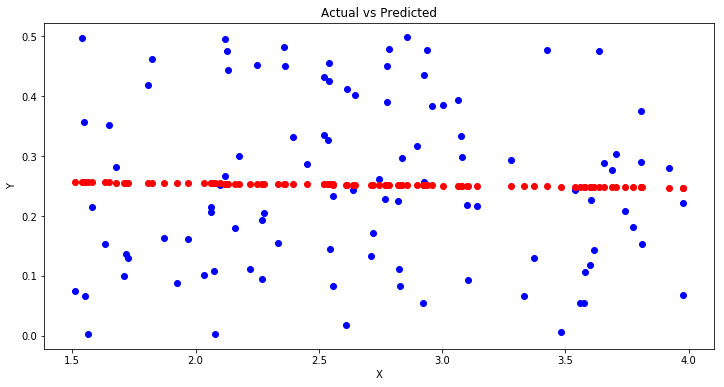

In [51]:
#plotting
plt.figure(figsize = (12 , 6))
plt.plot(x,y, 'bo')
plt.plot(x,ypred, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted')
plt.show()

In [59]:
#using sklearn
from sklearn.linear_model import LinearRegression



In [78]:
ads = pd.read_csv('C:\ProgramData\Anaconda3\sad.csv')
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [71]:
cols = ['TV', 'radio']
X = ads[cols]
Y = ads['sales']

In [72]:
Im = LinearRegression()
model = Im.fit(X,Y)

In [74]:
print('alpha = {}' .format(model.intercept_))
print('beta = {}'.format(model.coef_))

alpha = 2.9210999124051362
beta = [0.04575482 0.18799423]


In [87]:
#predictions
#ypred = bX + a
print (model.predict([[44.5, 39.3]]))

[12.34536229]


In [3]:
from numpy import *
import matplotlib.pyplot as plt

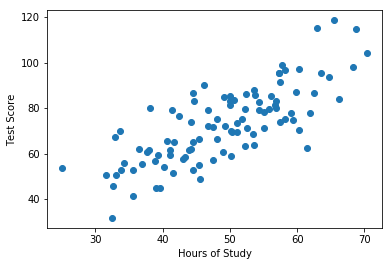

In [4]:
dpoints = genfromtxt('C:\ProgramData\Anaconda3\gradient_descent.csv',delimiter = ',')
x = array(dpoints[:,0])
y = array(dpoints[:,1])

plt.scatter(x,y)
plt.xlabel('Hours of Study')
plt.ylabel('Test Score')
plt.show()

In [5]:
#hyperparameters
#y = mx+b
learning_rate = 0.0001
initial_b = 0
initial_m = 0
iterations = 10

In [10]:
def compute_perror (b,m,dpoints):
    total_error = 0
    N = float (len(dpoints))
    
    for i in range (0, len(dpoints)):
        x = dpoints[1,0]
        y = dpoints[1,1]
        total_error += (y-(m*x+b))**2
        
    return total_error / N

def gradient_descent_runner (dpoints, starting_b, starting_m,learning_rate, iterations):
    b = starting_b
    m = starting_m
    error_graph = []
    
    for i in range(iterations):
        error_graph.append(compute_perror(b,m,dpoints))
        b,m = gradient_descent(b,m, array(dpoints),learning_rate)
                           
    return [b,m,error_graph]
        
def gradient_descent(b_current, m_current, dpoints, learning_rate):
    m_gradient = 0
    b_gradient = 0
                           
    N = float(len(dpoints))
                           
    for i in range(0, len(dpoints)):
                           
        x = dpoints[1,0]
        y = dpoints[1,1]
    
        m_gradient += -(2/N)  * x *   (y-m_current * x + b_current)
        b_gradient += -(2/N) * (y-m_current * x + b_current)
        m_update = m_current - learning_rate * m_gradient
        b_update = b_current - learning_rate * b_gradient
        
    return b_update , m_update
        



In [11]:
b, m, error_graph = gradient_descent_runner(dpoints, initial_b, initial_m, learning_rate, iterations)
print("Optimized b: ",b)
print("Optimized m: ",m)
print("Minimized error: ", compute_perror(b, m, dpoints))

Optimized b:  0.024098410130226372
Optimized m:  1.2875010355410925
Minimized error:  0.0011268070647154043


<function matplotlib.pyplot.show(*args, **kw)>

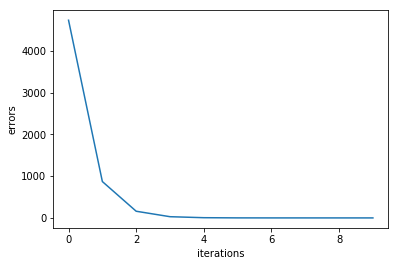

In [13]:
plt.plot(error_graph)
plt.xlabel("iterations")
plt.ylabel("errors")
plt.show